In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt

rvs0:[5 2 2 ... 1 4 2]
rvs1:[1 5 4 ... 8 6 5]
rvs2:[5 7 8 ... 7 5 6]


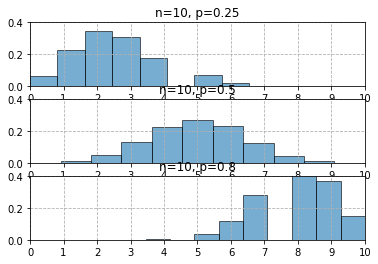

In [6]:
fig, ax = plt.subplots(3,1)
params = [(10,0.25),(10,0.5),(10,0.8)]
x = range(0,11)
for i in range(len(params)):
    binom_rv = binom(n=params[i][0], p=params[i][1])
    rvs = binom_rv.rvs(size=100000)
    ax[i].hist(rvs, bins=11, density=True, alpha=0.6, edgecolor='k')
    ax[i].set_title(f'n={params[i][0]}, p={params[i][1]}')
    ax[i].set_xlim(0, 10)
    ax[i].set_ylim(0, 0.4)
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')
    print(f'rvs{i}:{rvs}')
plt.show()

sample_two

mean=4.0, ver=12.0


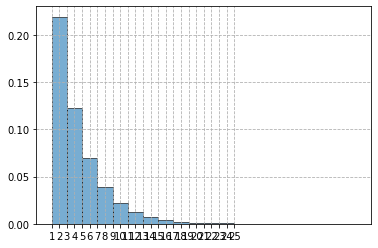

In [10]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

x = range(1,21)
geom_rv = geom(p=0.25)
geom_rvs = geom_rv.rvs(size=100000)
plt.hist(geom_rvs, bins=20, density=True, alpha=0.6, edgecolor='k')
plt.gca().axes.set_xticks(range(1,26))

mean, var, skew, kurt = geom_rv.stats(moments='mvsk')
print(f'mean={mean}, ver={var}')
plt.grid(ls='--')
plt.show()

sample with poisson

lambda=10, E[X]=10.0, V[X]=10.0
lambda=2, E[X]=2.0, V[X]=2.0


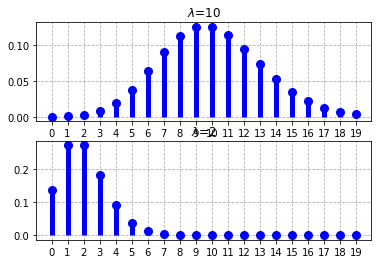

In [12]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
x = range(0, 20)
params = [10,2]
for i in range(len(params)):
    poisson_rv = poisson(mu=params[i])
    mean, var, skew, kurt = poisson_rv.stats(moments='mvsk')
    ax[i].plot(x, poisson_rv.pmf(x), 'bo', ms=8)
    ax[i].vlines(x, 0, poisson_rv.pmf(x), colors='b', lw=5)
    ax[i].set_title(f'$\\lambda$={params[i]}')
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')
    print(f'lambda={params[i]}, E[X]={mean}, V[X]={var}')
plt.show()

sklearn.datasets as make_blobs

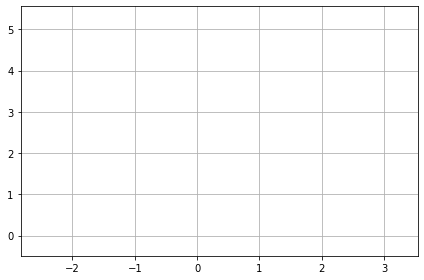

In [8]:
from sklearn.datasets import make_blobs
X, y =make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

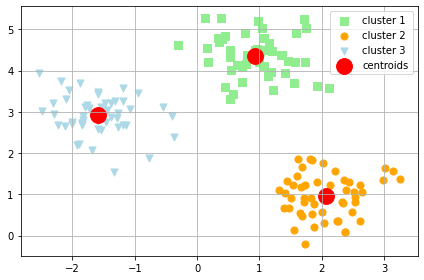

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='o',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

In [10]:
print('Distortion:%0.2f'% km.inertia_)

Distortion:72.48


D:\anaconda3\envs\Pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


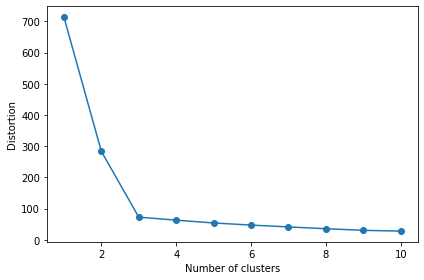

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

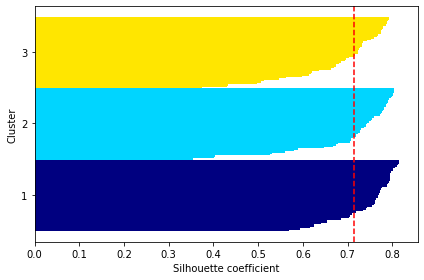

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

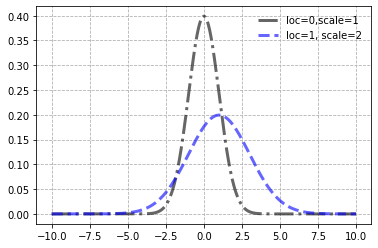

In [16]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

fid, ax = plt.subplots(1,1)
norm_0 = norm(loc=0, scale=1)
norm_1 = norm(loc=1, scale=2)

x = np.linspace(-10,10,1000)
ax.plot(x, norm_0.pdf(x), color='k', lw=3, alpha=0.6, label='loc=0,scale=1', linestyle='-.')
ax.plot(x, norm_1.pdf(x), color='b', lw=3, alpha=0.6, label='loc=1, scale=2', linestyle='--')
ax.legend(loc='best', frameon=False)
plt.grid(ls='--')
plt.show()

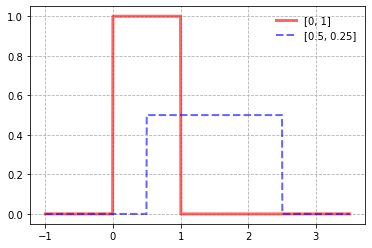

In [3]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,3.5,1000)
uniform_rv_0 = uniform()
uniform_rv_1 = uniform(loc=0.5, scale=2)
plt.plot(x, uniform_rv_0.pdf(x), color='r', lw=3, alpha=0.6, label='[0, 1]')
plt.plot(x, uniform_rv_1.pdf(x), color='b', lw=2, alpha=0.6, label='[0.5, 0.25]', linestyle='--')
plt.legend(loc='best',frameon=False)
plt.grid(ls='--')
plt.show()

指数采样分布

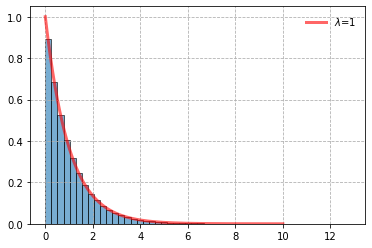

In [4]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,1000)
expon_rv = expon()
expon_rvs = expon_rv.rvs(100000)
plt.plot(x, expon_rv.pdf(x), color='r', lw=3, alpha=0.6, label='$\\lambda$=1')
plt.hist(expon_rvs, density=True, alpha=0.6, bins=50,edgecolor='k')
plt.legend(loc='best', frameon=False)
plt.grid(ls='--')
plt.show()

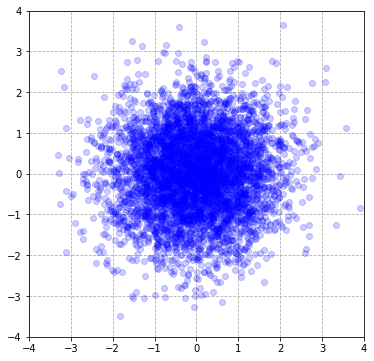

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0, 0])
conv = np.array([[1, 0],
                [0, 1]])
x, y = np.random.multivariate_normal(mean=mean,cov=conv,size=5000).T
plt.figure(figsize=(6,6))
plt.plot(x, y, 'bo', alpha=0.2)
plt.gca().axes.set_xlim(-4, 4)
plt.gca().axes.set_ylim(-4, 4)
plt.grid(ls='--')
plt.show()

均值为0，方差为1，协方差为0的二元标准正态分布

生成二元一般正态分布

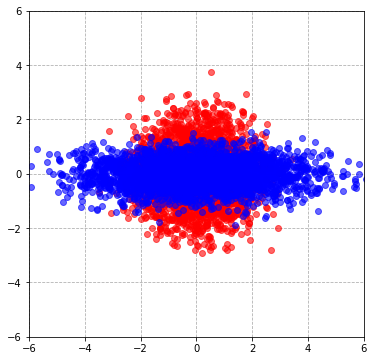

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0, 0])
conv_1 = np.array([[1, 0], [0, 1]])
conv_2 = np.array([[4, 0], [0, 0.25]])
x_1, y_1 = np.random.multivariate_normal(mean=mean, cov=conv_1, size=3000).T
x_2, y_2 = np.random.multivariate_normal(mean=mean, cov=conv_2, size=3000).T
plt.figure(figsize=(6, 6))
plt.plot(x_1, y_1, 'ro', alpha=0.6)
plt.plot(x_2, y_2, 'bo', alpha=0.6)
plt.gca().axes.set_xlim(-6, 6)
plt.gca().axes.set_ylim(-6, 6)
plt.grid(ls='--')
plt.show()

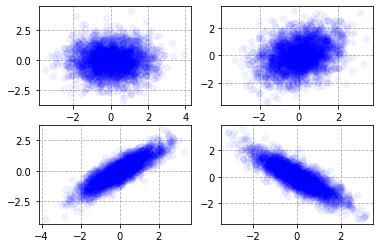

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax  = plt.subplots(2, 2)
mean = np.array([0, 0])
conv_1 = np.array([[1, 0], [0, 1]])
conv_2 = np.array([[1, 0.3], [0.3, 1]])
conv_3 = np.array([[1, 0.85], [0.85, 1]])
conv_4 = np.array([[1, -0.85], [-0.85, 1]])

x_1, y_1 = np.random.multivariate_normal(mean=mean, cov=conv_1, size=3000).T
x_2, y_2 = np.random.multivariate_normal(mean=mean, cov=conv_2, size=3000).T
x_3, y_3 = np.random.multivariate_normal(mean=mean, cov=conv_3, size=3000).T
x_4, y_4 = np.random.multivariate_normal(mean=mean, cov=conv_4, size=3000).T

ax[0][0].plot(x_1, y_1, 'bo', alpha=0.05)
ax[0][1].plot(x_2, y_2, 'bo', alpha=0.05)
ax[1][0].plot(x_3, y_3, 'bo', alpha=0.05)
ax[1][1].plot(x_4, y_4, 'bo', alpha=0.05)

ax[0][0].grid(ls='--')
ax[0][1].grid(ls='--')
ax[1][0].grid(ls='--')
ax[1][1].grid(ls='--')
plt.show()

[[1.03637489 0.89157232]
 [0.89157232 1.04583476]]
[[10363.74890116  8915.72321218]
 [ 8915.72321218 10458.34764934]]


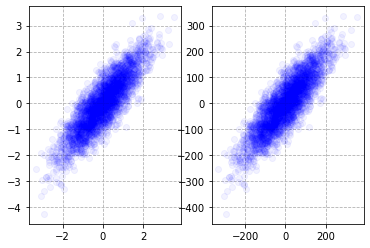

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
mean = np.array([0, 0])
conv = np.array([[1, 0.85], [0.85, 1]])
x_1, y_1 = np.random.multivariate_normal(mean, conv, 3000).T
x_2, y_2 = x_1*100, y_1*100
ax[0].plot(x_1, y_1, 'bo', alpha=0.05)
ax[1].plot(x_2, y_2, 'bo', alpha=0.05)
S_1 = np.vstack((x_1, y_1))
S_2 = np.vstack((x_2, y_2))
print(np.cov(S_1))
print(np.cov(S_2))

ax[0].grid(ls='--')
ax[1].grid(ls='--')
plt.show()

In [15]:
import numpy as np


mean = np.array([0, 0])
conv = np.array([[1, 0.85], [0.85, 1]])
x_1, y_1 = np.random.multivariate_normal(mean, conv, 3000).T
x_2, y_2 = x_1*100, y_1*100
s1 = np.vstack((x_1, y_1))
s2 = np.vstack((x_2, y_2))
print(np.corrcoef(s1))
print('\t')
print(np.corrcoef(s2))

[[1.         0.85011056]
 [0.85011056 1.        ]]
	
[[1.         0.85011056]
 [0.85011056 1.        ]]


In [2]:
import numpy as np
X = [-2, -1, -1, 0, 0, 1, 1, 2]
Y = [0, 1, -1, 2, -2, 1, -1,0]
S = np.vstack((X, Y))
print(np.cov(S))

[[1.71428571 0.        ]
 [0.         1.71428571]]


C:\Users\Ryan\AppData\Local\Temp/ipykernel_14964/3652991226.py:17: RuntimeWarning: covariance is not positive-semidefinite.
  x_3, y_3 = np.random.multivariate_normal(mean_3, conv_3, 2000).T


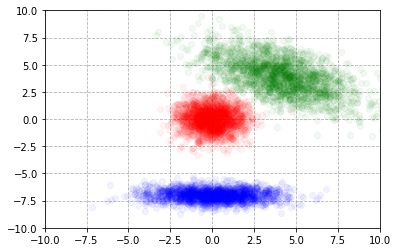

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mean_1 = np.array([0,0])
conv_1 = np.array([[1,0], [0,1]])

mean_2 = np.array([0, -7])
conv_2 = np.array([[4,0],[0,0.25]])

mean_3 = np.array([4, 4])
conv_3 = np.array([[4,-3], [-3, 0.25]])

x_1, y_1 = np.random.multivariate_normal(mean_1, conv_1, 2000).T

x_2, y_2 = np.random.multivariate_normal(mean_2, conv_2, 2000).T

x_3, y_3 = np.random.multivariate_normal(mean_3, conv_3, 2000).T

plt.plot(x_1, y_1, 'ro', alpha=0.05)
plt.plot(x_2, y_2, 'bo', alpha=0.05)
plt.plot(x_3, y_3, 'go', alpha=0.05)

plt.gca().axes.set_xlim(-10, 10)
plt.gca().axes.set_ylim(-10, 10)
plt.grid(ls='--')
plt.show()

[25.+0.j 50.+0.j]
[[-0.8 -0.6]
 [ 0.6 -0.8]]


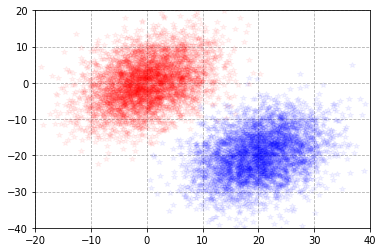

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

mean_1 = np.array([0,0])
mean_2 = np.array([20, -20])
conv = np.array([[34,12], [12,41]])


x_1, y_1 = np.random.multivariate_normal(mean_1, conv, 4000).T

x_2, y_2 = np.random.multivariate_normal(mean_2, conv, 4000).T

plt.plot(x_1, y_1, 'r*', alpha=0.05)
plt.plot(x_2, y_2, 'b*', alpha=0.05)

plt.gca().axes.set_xlim(-20, 40)
plt.gca().axes.set_ylim(-40, 20)
evalue, evector = linalg.eig(conv)
print(evalue)
print(evector)
plt.grid(ls='--')
plt.show()